In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [3]:
df=pd.read_csv("house_price.csv")
df        

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [4]:
df.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


<Axes: xlabel='price_per_sqft'>

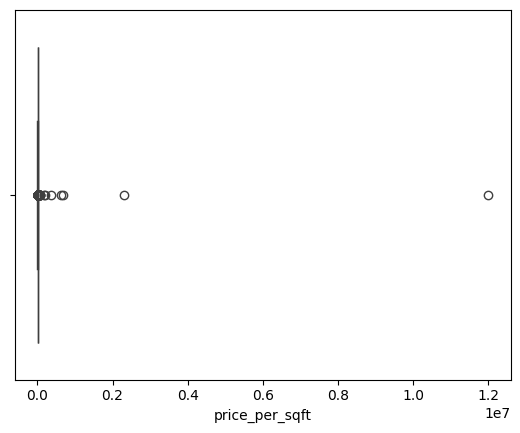

In [5]:
sns.boxplot(x="price_per_sqft",data=df)

<Axes: ylabel='price_per_sqft'>

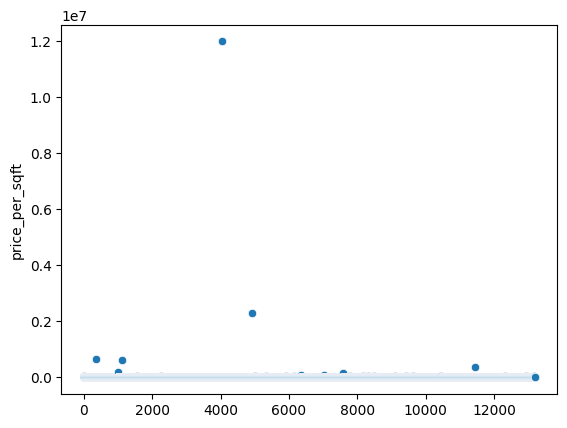

In [6]:
sns.scatterplot(df['price_per_sqft'])


C:\Users\Rayee\AppData\Local\Temp\ipykernel_10128\2509724367.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'],kde=True)


<Axes: xlabel='price_per_sqft', ylabel='Density'>

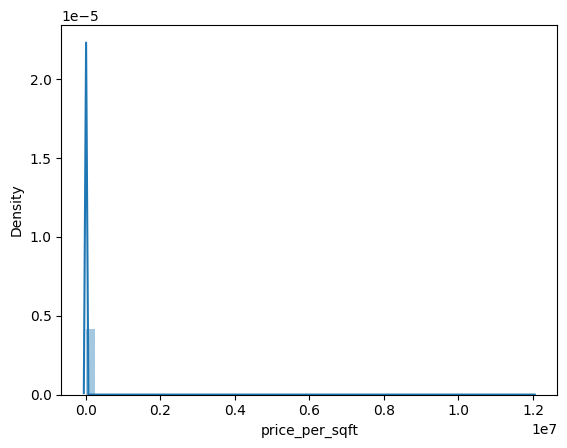

In [7]:
sns.distplot(df['price_per_sqft'],kde=True)


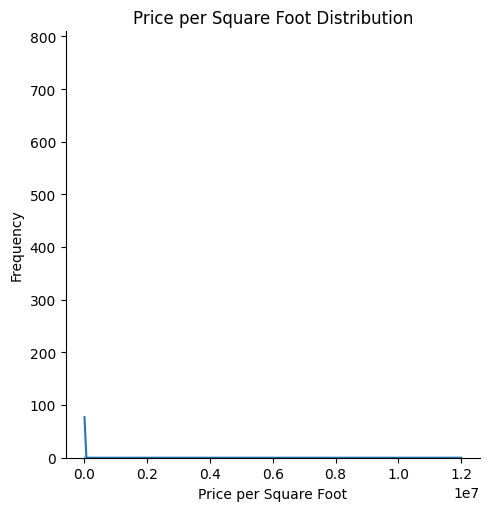

In [8]:
sns.displot(df['price_per_sqft'], kde=True)
plt.title('Price per Square Foot Distribution')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.show

Removing outliers


method-1 

using mean and std or using z score or normal distribution

In [18]:
mean=df.price_per_sqft.mean().round(2)
print(mean)


7920.34


In [17]:
std=df.price_per_sqft.std().round(2)
print(std)

106727.16


In [21]:
threshold = 3

lower = mean - (threshold * std).round(2)
upper= mean + (threshold * std)
print(lower)
print(upper)

-312261.13999999996
328101.82


In [22]:
outliers = df[(df['price_per_sqft'] < lower) | (df['price_per_sqft'] > upper)]
print("Outliers based on mean and standard deviation:")
print(outliers)

Outliers based on mean and standard deviation:
             location       size  total_sqft  bath  price  bhk  price_per_sqft
345             other  3 Bedroom        11.0   3.0   74.0    3          672727
1106            other  5 Bedroom        24.0   2.0  150.0    5          625000
4044   Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4        12000000
4924            other      7 BHK         5.0   7.0  115.0    7         2300000
11447      Whitefield  4 Bedroom        60.0   4.0  218.0    4          363333


In [23]:
new_df=df[(df['price_per_sqft'] >= lower) & (df['price_per_sqft'] <= upper)]
new_df


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


method-2 percentile method

In [24]:
upper=df.price_per_sqft.quantile(.99)
lower=df.price_per_sqft.quantile(.01)
print("upper",upper)
print("lower",lower)

upper 23674.45000000001
lower 2549.0


In [25]:
outliers = df[(df['price_per_sqft'] < lower) | (df['price_per_sqft'] > upper)]
print("Outliers based on mean and standard deviation:")
print(outliers)

Outliers based on mean and standard deviation:
              location       size  total_sqft  bath   price  bhk  \
9                other  6 Bedroom      1020.0   6.0   370.0    6   
20             Kengeri      1 BHK       600.0   1.0    15.0    1   
45          HSR Layout  8 Bedroom       600.0   9.0   200.0    8   
130    Electronic City      2 BHK       880.0   1.0    16.5    2   
169           Attibele      1 BHK       450.0   1.0    11.0    1   
...                ...        ...         ...   ...     ...  ...   
13081            other  6 Bedroom      8000.0   6.0  2800.0    6   
13094            other  4 Bedroom      1200.0   5.0   325.0    4   
13127            other  4 Bedroom      1200.0   5.0   325.0    4   
13185         Hulimavu      1 BHK       500.0   1.0   220.0    1   
13186            other  4 Bedroom      1200.0   5.0   325.0    4   

       price_per_sqft  
9               36274  
20               2500  
45              33333  
130              1875  
169             

In [53]:
new_df2=df[(df['price_per_sqft'] >= lower) & (df['price_per_sqft'] <= upper)]

print("Number of outliers=",len(df)-len(new_df2))
new_df2


Number of outliers= 259


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


method-3 iqr method

In [27]:
q1=df.price_per_sqft.quantile(.25)
q3=df.price_per_sqft.quantile(.75)
iqr=q3-q1
print(q1,q3,iqr)

4267.0 7317.0 3050.0


In [28]:
upper=q3+1.5*iqr
lower=q1-1.5*iqr
print(upper,lower)

11892.0 -308.0


In [29]:
outliers = df[(df['price_per_sqft'] < lower) | (df['price_per_sqft'] > upper)]
print("Outliers based on mean and standard deviation:")
print(outliers)

Outliers based on mean and standard deviation:
               location       size  total_sqft  bath  price  bhk  \
7          Rajaji Nagar      4 BHK      3300.0   4.0  600.0    4   
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
22          Thanisandra  4 Bedroom      2800.0   5.0  380.0    4   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
48             KR Puram  2 Bedroom       800.0   1.0  130.0    2   
...                 ...        ...         ...   ...    ...  ...   
13142             other      2 BHK      1140.0   1.0  185.0    2   
13157             other  7 Bedroom      1400.0   7.0  218.0    7   
13185          Hulimavu      1 BHK       500.0   1.0  220.0    1   
13186             other  4 Bedroom      1200.0   5.0  325.0    4   
13191  Ramamurthy Nagar  7 Bedroom      1500.0   9.0  250.0    7   

       price_per_sqft  
7               18181  
9               36274  
22              13571  
45              33333  
48              

In [57]:
new_df3=df[(df['price_per_sqft'] >= lower) & (df['price_per_sqft'] <= upper)]

print("Number of outliers=",len(df)-len(new_df3))
new_df3

Number of outliers= 1265


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


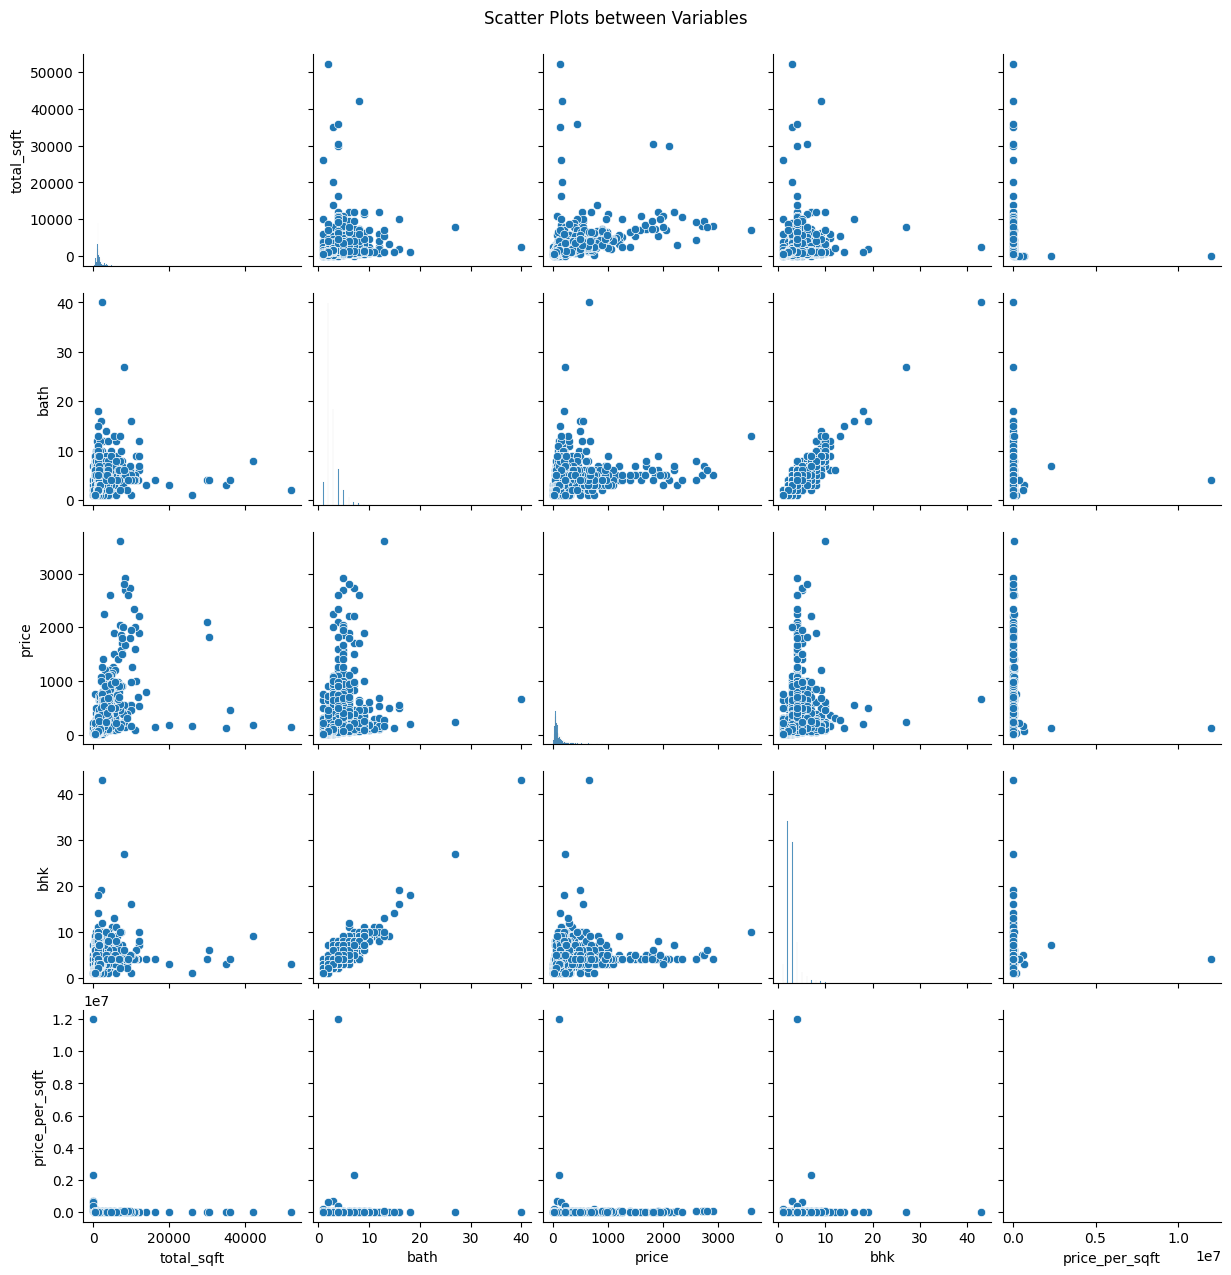

In [30]:
sns.pairplot(df)
plt.suptitle('Scatter Plots between Variables', y=1.02)
plt.show()

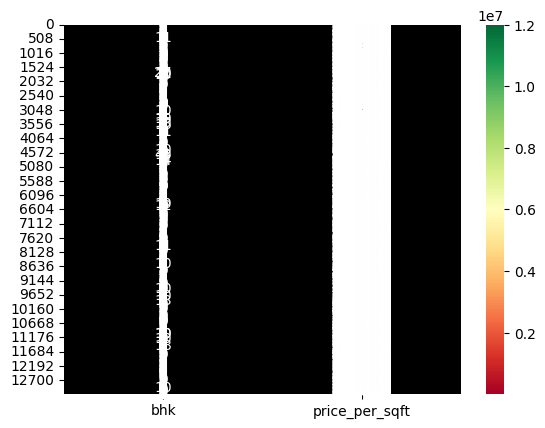

In [33]:
numeric_df = df.select_dtypes(include=[int])
sns.heatmap(numeric_df, annot=True, cmap='RdYlGn', linewidths=0.5, linecolor='black')
plt.show()

Check the correlation between all the numerical columns and plot heatmap